In [20]:
!pip install pandas openpyxl geopandas matplotlib

import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
data = '../in/datacentermap.csv'

#dc_df = datacenter_dataframe
dc_df = pd.read_csv(data)

# Remove inplace=True
dc_df.drop(['postal', 'link_profile'], axis=1, inplace=True)

mainCountry = 'USA'

mask = dc_df['country'] == mainCountry

dc_df = dc_df[mask]

# Create a GeoDataFrame
dc_gdf = gpd.GeoDataFrame(dc_df, geometry=gpd.points_from_xy(dc_df.longitude, dc_df.latitude))

# Define or identify the coordinate reference system (CRS)
# For the United States, you can use EPSG:4326 (WGS 84) which is commonly used for latitude and longitude coordinates
dc_gdf.crs = "EPSG:4326"

# Loading custom us state shapefile
states_map = gpd.read_file('../in/States_shapefile-shp/States_shapefile.shp')

In [6]:
power_df = pd.read_excel('../in/avgprice_annual.xlsx', skiprows=1)

#only keeping power prices from 2020
power_df = power_df[power_df['Year'] == 2020]

#only keeping "total electric industry" as the industry sector as its the only one that has all 51 states.
power_df = power_df[power_df['Industry Sector Category'] == 'Total Electric Industry']


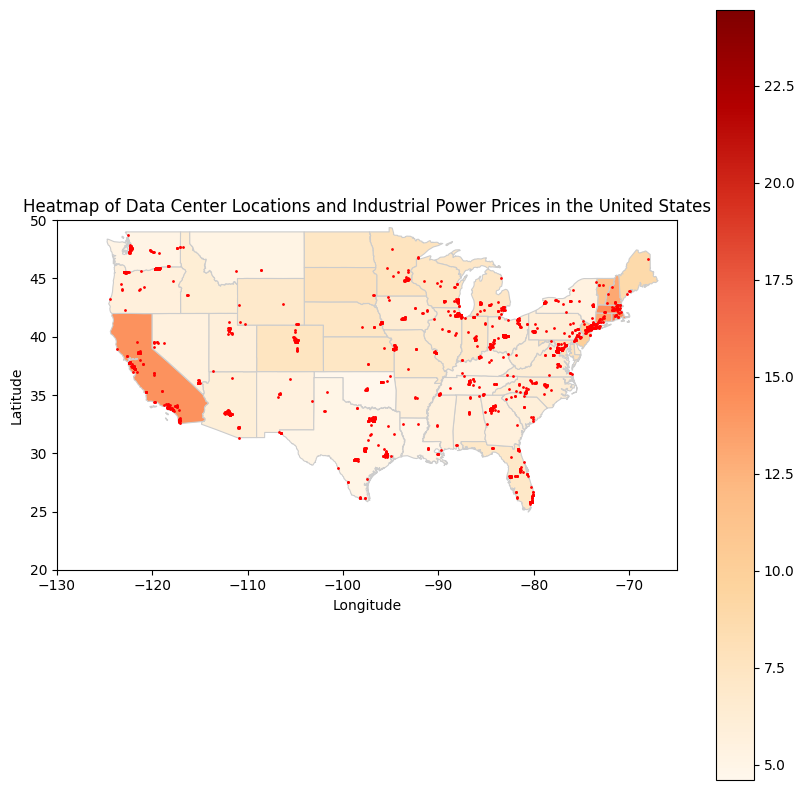

In [7]:
merged_data = states_map.merge(power_df, how='left', left_on='State_Code', right_on='State')

power_sector = 'Industrial'

# Plot the custom map
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column=power_sector, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot the data points on the map
dc_gdf.plot(ax=ax, color='red', markersize=1)

# Set the extent of the plot to focus on the United States

#ax.set_xlim(-180, -65)  # Adjust these values based on your preference

ax.set_xlim(-130, -65)  # Adjust these values based on your preference
ax.set_ylim(20, 50)     # Adjust these values based on your preference

plt.title(f'Heatmap of Data Center Locations and {power_sector} Power Prices in the United States')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [19]:
print(states_map.columns)
print(dc_df.columns)

Index(['name', 'id', 'latitude', 'longitude', 'address', 'city', 'state',
       'country', 'geometry'],
      dtype='object')


In [10]:
state_counts = dc_df['state'].value_counts().reset_index()
# Convert all string values in the dataframe to uppercase since the shapefile uses uppercase state names
state_counts = state_counts.map(lambda x: x.upper() if isinstance(x, str) else x)
state_counts.columns = ['State_Name', 'Datacenter_Count']
state_counts


,State_Name,Datacenter_Count
0,VIRGINIA,311
1,CALIFORNIA,259
2,TEXAS,241
3,OHIO,150
4,NEW YORK,128
5,ILLINOIS,123
6,FLORIDA,119
7,OREGON,106
8,WASHINGTON,84
9,GEORGIA,75


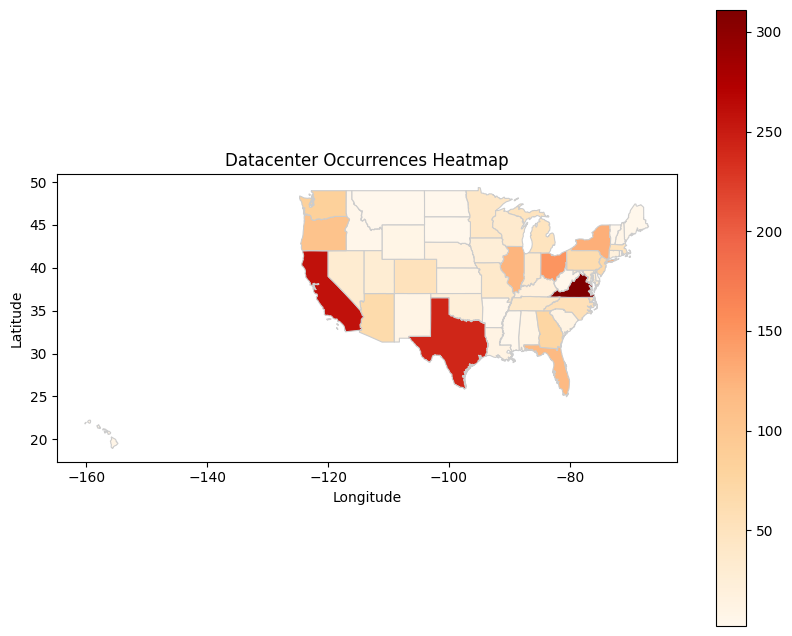

In [11]:
# Merge the state counts with the state shapefile map based on state names
merged_data2 = states_map.merge(state_counts, how='left', on='State_Name')

# Plot the map with state occurrences heatmap
fig, ax = plt.subplots(figsize=(10, 8))
merged_data2.plot(column='Datacenter_Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Datacenter Occurrences Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()